In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as smf
from datetime import date, timedelta
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection  import train_test_split
from matplotlib import pyplot
import plotly.graph_objects as go
%matplotlib inline

In [8]:
#import original dataset 
df=pd.read_csv('E:/Hotel_Bookings/hotel_bookings.csv')

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [11]:
df.info()
#convert the dtype for any variables required. 
#Ex: arrival_date_month should be int, not object
#    Children should be int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [127]:
#Date transformation to convert from month to date 
look_up = {'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05',
            'June': '06', 'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'}
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: look_up[x])

In [ ]:
df[["arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","reservation_status_date"]] = df[["arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","reservation_status_date"]].apply(pd.to_datetime)


In [137]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [138]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [139]:
#Detect duplicated rows
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [15]:
# Colums will be dropped from the data set as they provide no insight: Agent,Company and Distribution channel
# Rows deleted as it is a small portion of the entire dataset: Children 4 Rows and Country 488.

In [140]:
df_1=df.drop(['agent','company','country'],axis='columns')

In [141]:
#Re-confirm if there's any remaining null values in the dataset
df_2=df_1.dropna()

In [142]:
df_3=df_2.drop_duplicates()
df_3.shape

(85594, 29)

In [149]:
df_num = df_3.loc[:,['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','adr']]
df_num.shape

(85594, 7)

In [51]:
from scipy import stats
stat.zcore

#outlier treatment (to remove any values outside 3 std)

In [ ]:
z_scores = stats.zscore(df_num)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_num[filtered_entries]

In [ ]:
new_df

In [238]:
#Correlation of variables
corr=new_df.corr()
display(corr)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr
lead_time,1.000000,0.251986,0.359052,0.189094,0.044968,NaN,0.056439
stays_in_weekend_nights,0.251986,1.000000,0.380786,0.134399,0.029692,NaN,0.065254
stays_in_week_nights,0.359052,0.380786,1.000000,0.163791,0.035660,NaN,0.100001
adults,0.189094,0.134399,0.163791,1.000000,0.072318,NaN,0.349353
children,0.044968,0.029692,0.035660,0.072318,1.000000,NaN,0.171905
babies,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adr,0.056439,0.065254,0.100001,0.349353,0.171905,NaN,1.000000


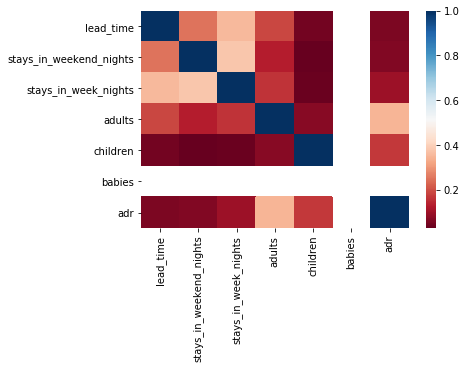

In [239]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")
#This confirms, there's no high multi-colinearity that needs to be eliminated, except for date attibutes 

In [172]:
df_merge =new_df.merge(df_3,left_index=True, right_index=True, suffixes=('_x','_y'))
df_merge

,lead_time_x,stays_in_weekend_nights_x,stays_in_week_nights_x,adults_x,children_x,babies_x,adr_x,hotel,is_canceled,lead_time_y,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr_y,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,7,0,1,1,0.0,0,75.00,Resort Hotel,0,7,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,13,0,1,1,0.0,0,75.00,Resort Hotel,0,13,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,14,0,2,2,0.0,0,98.00,Resort Hotel,0,14,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,0,0,2,2,0.0,0,107.00,Resort Hotel,0,0,...,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,9,0,2,2,0.0,0,103.00,Resort Hotel,0,9,...,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0.0,0,96.14,City Hotel,0,23,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,102,2,5,3,0.0,0,225.43,City Hotel,0,102,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,34,2,5,2,0.0,0,157.71,City Hotel,0,34,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,109,2,5,2,0.0,0,104.40,City Hotel,0,109,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [173]:
df_merge.drop(['lead_time_y','stays_in_weekend_nights_y','stays_in_week_nights_y','adults_y','children_y','babies_y','adr_y'], axis='columns',inplace=True)
df_merge

,lead_time_x,stays_in_weekend_nights_x,stays_in_week_nights_x,adults_x,children_x,babies_x,adr_x,hotel,is_canceled,arrival_date_year,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,7,0,1,1,0.0,0,75.00,Resort Hotel,0,1970-01-01 00:00:00.000002015,...,A,C,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02
3,13,0,1,1,0.0,0,75.00,Resort Hotel,0,1970-01-01 00:00:00.000002015,...,A,A,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02
4,14,0,2,2,0.0,0,98.00,Resort Hotel,0,1970-01-01 00:00:00.000002015,...,A,A,0,No Deposit,0,Transient,0,1,Check-Out,2015-07-03
6,0,0,2,2,0.0,0,107.00,Resort Hotel,0,1970-01-01 00:00:00.000002015,...,C,C,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-03
7,9,0,2,2,0.0,0,103.00,Resort Hotel,0,1970-01-01 00:00:00.000002015,...,C,C,0,No Deposit,0,Transient,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0.0,0,96.14,City Hotel,0,1970-01-01 00:00:00.000002017,...,A,A,0,No Deposit,0,Transient,0,0,Check-Out,2017-09-06
119386,102,2,5,3,0.0,0,225.43,City Hotel,0,1970-01-01 00:00:00.000002017,...,E,E,0,No Deposit,0,Transient,0,2,Check-Out,2017-09-07
119387,34,2,5,2,0.0,0,157.71,City Hotel,0,1970-01-01 00:00:00.000002017,...,D,D,0,No Deposit,0,Transient,0,4,Check-Out,2017-09-07
119388,109,2,5,2,0.0,0,104.40,City Hotel,0,1970-01-01 00:00:00.000002017,...,A,A,0,No Deposit,0,Transient,0,0,Check-Out,2017-09-07


In [174]:
#The number of zeros in each column. 
df_merge.isin([0]).sum()
#as seen, the number of babies are 0 for all the rows therefore it can be removed

lead_time_x                        5630
stays_in_weekend_nights_x         32043
stays_in_week_nights_x             5745
adults_x                              0
children_x                        73755
babies_x                          78078
adr_x                              1522
hotel                                 0
is_canceled                       56807
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
meal                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                 74818
previous_cancellations            76517
previous_bookings_not_canceled    74648
reserved_room_type                    0
assigned_room_type                    0
booking_changes                   64772
deposit_type                          0
days_in_waiting_list              77381
customer_type                         0


In [175]:
df_merge.drop(['babies_x'], axis='columns',inplace=True)
df_merge.shape

(78078, 28)

In [167]:
gb=pd.pivot_table(df_merge, values=['adults_x','children_x','adr_x'],index=['hotel','customer_type','market_segment'],
                 aggfunc={'adults_x':[np.sum],#pd.Series.nunique],
                          'children_x':np.sum,
                          'adr_x':np.mean})
gb
#PIVOT TABLES CAN HELP TO UNDERSTAND THE DATA AND ANSWER SOME KEY QUESTIONS. THIS PIVOT TABLE WAS USED FOR EDA
#objective: best price and when?
#questions:
#1. How many hotel types: 2
#2. How many customer type: 4
#3. How many market segment: 7
#4. what country has the highest registrants?
#5. what country uses each type of market segment?
#6. customer vs market segment?
#7. market segment vs cancelation? 
#8. what is the deposit type and how it affects cancelation?
#9. lead time vs cancelation
#10. booking month vs cancelation
#11. country vs cancelation

adr_x adults_x children_x
                                                   mean      sum        sum
hotel        customer_type   market_segment                                
City Hotel   Contract        Direct           90.000000        4        0.0
                             Groups           62.884615       52        0.0
                             Offline TA/TO    84.954444      193        8.0
                             Online TA       107.775476     2195       20.0
             Group           Aviation        110.000000        2        0.0
                             Complementary    15.800000        6        0.0
                             Corporate        78.416667       16        0.0
                             Direct          111.321600       89        0.0
                             Groups           75.832500        8        0.0
                             Offline TA/TO    76.805204      175        3.0
                             Online TA       100.253827      150        3.0
             Transient       Aviation        100.943297      185        0.0
                             Complementary     2.096726      670       13.0
                             Corporate        80.258909     1781       11.0
                             Direct          116.758894     8413      381.0
                             Groups           92.064830      739        0.0
                             Offline TA/TO    84.757650     8516      176.0
                             Online TA       117.611716    59350     2007.0
             Transient-Party Aviation         99.500000       10        0.0
                             Complementary    19.600000       18        1.0
                             Corporate        86.630498      690        1.0
                             Direct          109.046348      632       23.0
                             Groups           83.340211     2516       15.0
                             Offline TA/TO    88.188277     3039       24.0
                             Online TA       108.932016     2673      101.0
Resort Hotel Contract        Complementary     2.400000        1        0.0
                             Corporate        50.533333       35        1.0
                             Direct           54.000000       20        4.0
                             Groups           80.511053       37        0.0
                             Offline TA/TO    80.226273     2353       28.0
                             Online TA       134.750000        2        1.0
             Group           Complementary     0.000000        1        0.0
                             Corporate        60.630769       14        0.0
                             Direct           98.013016      114        2.0
                             Groups           47.041250       13        0.0
                             Offline TA/TO    74.672078      125        3.0
                             Online TA        72.580250      134        4.0
             Transient       Complementary     3.691205      266        8.0
                             Corporate        51.667919     1750       14.0
                             Direct          105.205583     9375      364.0
                             Groups           58.063217      456        1.0
                             Offline TA/TO    72.934332     7310      166.0
                             Online TA       107.437619    25735      795.0
             Transient-Party Complementary     5.500000       16        0.0
                             Corporate        51.588459      512        6.0
                             Direct          103.901062      738       32.0
                             Groups           62.460907     2601       13.0
                             Offline TA/TO    74.358029      971       26.0
                             Online TA       101.549806     1986       68.0

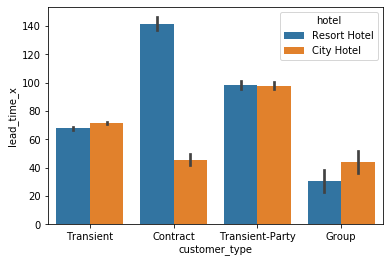

In [168]:
cs1 = sns.barplot(x="customer_type", y="lead_time_x", hue="hotel", data=df_merge)

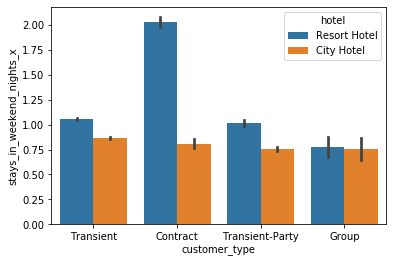

In [107]:
cs2 = sns.barplot(x="customer_type", y="stays_in_weekend_nights_x", hue="hotel", data=df_merge)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA6224EC48>]],
      dtype=object)

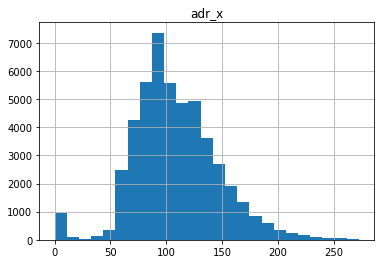

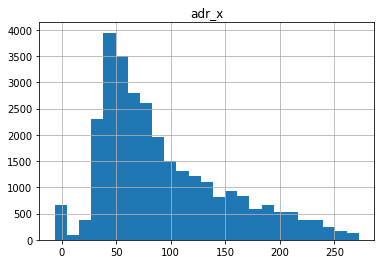

In [176]:
gr_main=df_merge.loc[:,["hotel","adr_x"]]
gr_1=gr_main[gr_main['hotel'] == 'City Hotel']
gr_2=gr_main[gr_main['hotel'] == 'Resort Hotel']
gr_1.hist(column=['adr_x'], bins=25, label = "Price") #city
gr_2.hist(column=['adr_x'], bins=25) #resort

In [ ]:
#OneHot Encoding

In [179]:
cat_df = df_merge.select_dtypes(include=[object])
cat_df.drop(['arrival_date_month'],axis='columns',inplace=True)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78078 entries, 2 to 119389
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   hotel                 78078 non-null  object
 1   meal                  78078 non-null  object
 2   market_segment        78078 non-null  object
 3   distribution_channel  78078 non-null  object
 4   reserved_room_type    78078 non-null  object
 5   assigned_room_type    78078 non-null  object
 6   deposit_type          78078 non-null  object
 7   customer_type         78078 non-null  object
 8   reservation_status    78078 non-null  object
dtypes: object(9)
memory usage: 6.0+ MB


C:\Users\sanje\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [180]:
X_2 = cat_df.apply(le.fit_transform)
X_2

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
2,1,0,3,1,0,2,0,2,1
3,1,0,2,0,0,0,0,2,1
4,1,0,6,3,0,0,0,2,1
6,1,0,3,1,2,2,0,2,1
7,1,1,3,1,2,2,0,2,1
...,...,...,...,...,...,...,...,...,...
119385,0,0,5,3,0,0,0,2,1
119386,0,0,6,3,4,4,0,2,1
119387,0,0,6,3,3,3,0,2,1
119388,0,0,6,3,0,0,0,2,1


In [181]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape


(78078, 49)

In [187]:
df_num1 = df_merge.select_dtypes(exclude=[object])

In [265]:
df_merge1 = df_num1.merge(X_2,left_index=True, right_index=True, suffixes=('_x','_y'))
df_merge1.head()

df_merge2 = df_merge1.drop(["arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","reservation_status_date"], axis='columns')


In [197]:
#Checking the distribution of target variable
df_merge1["is_canceled"].value_counts()

0    56807
1    21271
Name: is_canceled, dtype: int64

In [211]:
X = df_merge1.drop(["arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","reservation_status_date"], axis = 'columns')


y = df_merge1.iloc[:,6]
X.head()
X.dtypes

lead_time_x                         int64
stays_in_weekend_nights_x           int64
stays_in_week_nights_x              int64
adults_x                            int64
children_x                        float64
adr_x                             float64
is_canceled                         int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
required_car_parking_spaces         int64
total_of_special_requests           int64
hotel                               int32
meal                                int32
market_segment                      int32
distribution_channel                int32
reserved_room_type                  int32
assigned_room_type                  int32
deposit_type                        int32
customer_type                       int32
reservation_status                  int32
dtype: object

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state = 0)

In [ ]:
#Logistic Regression for predicting whether a booking will be canceled or not

In [226]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()

In [227]:
log_classifier.fit(X_train,y_train)

C:\Users\sanje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
ypred_log = log_classifier.predict(X_test)

In [231]:
from sklearn.metrics import classification_report

In [232]:
print(classification_report(y_test,ypred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16965
           1       1.00      1.00      1.00      6459

    accuracy                           1.00     23424
   macro avg       1.00      1.00      1.00     23424
weighted avg       1.00      1.00      1.00     23424



In [ ]:
#usually its never 100% accurate, therefore lets try a different technique

In [233]:
from sklearn.svm import SVC

In [234]:
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [235]:
y_pred_SVM =classifier.predict(X_test)

In [236]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16965
           1       1.00      1.00      1.00      6459

    accuracy                           1.00     23424
   macro avg       1.00      1.00      1.00     23424
weighted avg       1.00      1.00      1.00     23424



In [ ]:
#again the result is a 100% so with the help of professor, it was identified that maybe it is the dataset

In [ ]:
X_1 = df_merge1.drop(["arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","reservation_status_date"], axis = 'columns')


y = df_merge1.iloc[:,6]

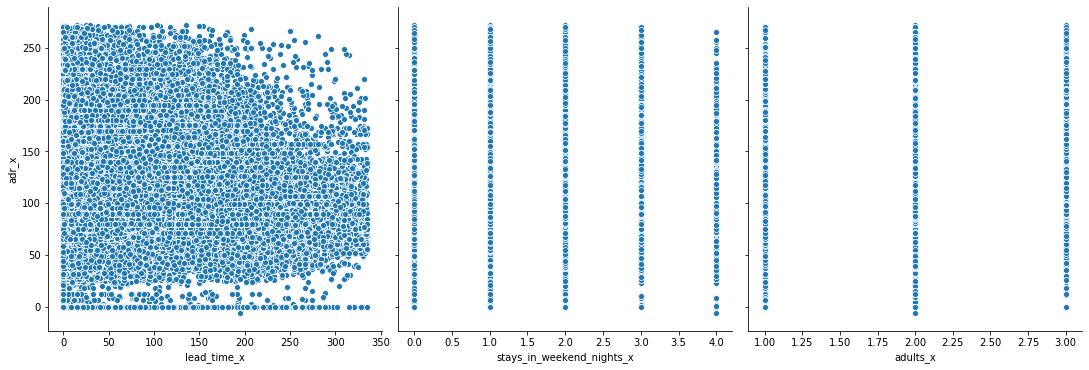

In [244]:
#Before going into another model, pairplot might be able to indicate if there's any trends in the data
sns.pairplot(df_merge1, x_vars=['lead_time_x','stays_in_weekend_nights_x','adults_x'], y_vars='adr_x', size=5)
#There's no trend as per the graphs below therefore lets dig deeper into the analysis

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of the graph
from sklearn import tree
from sklearn.externals.six import StringIO 

In [ ]:
# Supervised-Decsicion Tree Classification Model for Reservation Status

In [245]:
#Cancelation vs non cancelations reservation percentages

P = df_merge1.groupby("is_canceled")["reservation_status"].count().reset_index()
Percentages =P['Percentage'] = 100 * P["reservation_status"]  / P["reservation_status"].sum()
Percentages

0    72.75673
1    27.24327
Name: reservation_status, dtype: float64

In [246]:
# Correlation percentages
cancel_corr = df_merge1.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending= False )[1:]

reservation_status                0.886912
lead_time_x                       0.198997
required_car_parking_spaces       0.182616
market_segment                    0.177044
distribution_channel              0.146448
deposit_type                      0.131287
adr_x                             0.129722
total_of_special_requests         0.114150
assigned_room_type                0.094446
is_repeated_guest                 0.091920
adults_x                          0.089766
booking_changes                   0.086354
hotel                             0.082691
stays_in_week_nights_x            0.081977
meal                              0.055503
previous_bookings_not_canceled    0.054207
stays_in_weekend_nights_x         0.051824
previous_cancellations            0.049175
reserved_room_type                0.021943
children_x                        0.021293
customer_type                     0.021061
days_in_waiting_list              0.009466
Name: is_canceled, dtype: float64

In [ ]:
# From the above list it is obvious the the variables reservation_Status, lead_time_x, required_car_parking_spaces, 
# market_segment , distribution_channel are the five most related .

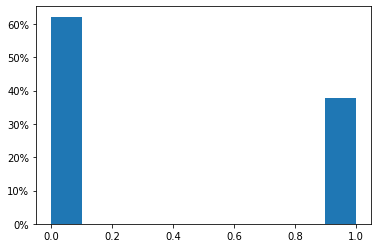

In [248]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


plt.hist(df_merge1.hotel, weights=np.ones(len(df_merge1.hotel)) / len(df_merge1.hotel))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#0 is resort and 1 is city hotel

In [266]:
X_1=df_merge2.drop(['reservation_status'],axis='columns')
y_1=df_merge2.loc[:,'reservation_status']

In [270]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1,y_1,test_size=.2, random_state = 0)

In [267]:
# The decision tree classifier.
clf = DecisionTreeClassifier()

In [271]:
# Training the Decision Tree
clf_train = clf.fit(X_train1, y_train1)
clf_train

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [273]:
y_pred_train = clf_train.predict(X_test1)

In [274]:
print(classification_report(y_test1,y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4114
           1       1.00      1.00      1.00     11299
           2       0.26      0.23      0.24       203

    accuracy                           0.98     15616
   macro avg       0.74      0.73      0.73     15616
weighted avg       0.98      0.98      0.98     15616

